In [2]:
import pandas as pd
import numpy as np

import snap

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f_network = snap.LoadEdgeListNet('finance_20/random-test/test-network-features/social_network_1_following.csv', '\t')

In [3]:
print '|V| = {}'.format(f_network.GetNodes())
print '|E| = {}'.format(f_network.GetEdges())
print 'Connected Network: {}'.format(snap.IsConnected(f_network))

|V| = 87857
|E| = 114282
Connected Network: False


In [4]:
indeg = []
count = []
indeg_distribution = snap.TIntPrV()
snap.GetInDegCnt(f_network, indeg_distribution)
for item in indeg_distribution:
    indeg.append(item.GetVal1())
    count.append(item.GetVal2())

<Container object of 36 artists>

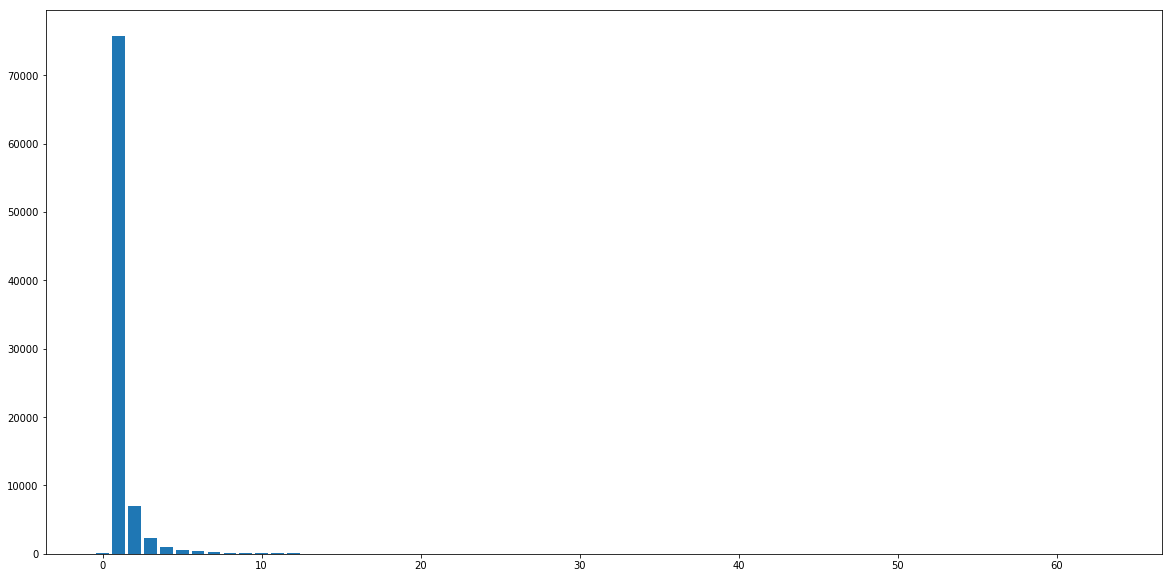

In [5]:
plt.figure(figsize=(20,10))
plt.bar(indeg, count)

In [6]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(f_network, InDegV)

In [7]:
nodesIndeg = []
for item in InDegV:
    nodesIndeg.append(tuple((item.GetVal1(), item.GetVal2())))


In [9]:
indeg_df = pd.DataFrame(nodesIndeg, columns=['id_node', 'indegree']).sort_values(by='indegree', ascending=False)

In [10]:
indeg_df.head(30)

,id_node,indegree
4412,4412,63
2742,2742,45
3532,3532,45
5238,5238,39
5553,5553,37
3519,3519,36
413,413,33
1764,1764,32
2923,2923,32
2179,2179,30


In [16]:
nodes = pd.read_csv('finance_20/random-test/test-network-features/social_network_1_following_nodes.csv', sep='\t')

In [19]:
topFollowed = indeg_df.merge(nodes, left_on='id_node', right_on='id')[['id_node', 'id_user', 'indegree']][:30]
topFollowed

,id_node,id_user,indegree
0,4412,813286,63
1,2742,12,45
2,3532,44196397,45
3,5238,20,39
4,5553,50393960,37
5,3519,783214,36
6,413,5943622,33
7,1764,1536791610,32
8,2923,14075928,32
9,2179,571202103,30


In [21]:
userdata = pd.read_csv('data-random/user_data_1.csv')

In [24]:
topFollowed.merge(userdata, on='id_user', how='left')

,id_node,id_user,indegree,screen_name,followers,following,lang,location,created_at,link_img
0,4412,813286,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2742,12,45,jack,3992649.0,3590.0,en,NaN,2006-03-21 20:50:14,http://pbs.twimg.com/profile_images/8398636093...
2,3532,44196397,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5238,20,39,ev,1815323.0,1008.0,en,"San Francisco, CA, US",2006-03-21 21:02:31,http://pbs.twimg.com/profile_images/6378280666...
4,5553,50393960,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3519,783214,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,413,5943622,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1764,1536791610,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2923,14075928,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2179,571202103,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
topFollowed.drop([1,3,10], inplace=True, axis=0)

In [27]:
topFollowed.to_csv('top_followed.csv', index=None)

Attach metadata obtained for top followed users of the network

In [7]:
topF = pd.read_csv('finance_20/random-test/test-network-features/top_followed.csv')
topF_metadata = pd.read_csv('finance_20/random-test/test-network-features/top_followed_data.csv')

In [9]:
topF.merge(topF_metadata, on='id_user', how='left')[['id_user','indegree','screen_name']]

,id_user,indegree,screen_name
0,813286,63,BarackObama
1,44196397,45,elonmusk
2,50393960,37,BillGates
3,783214,36,Twitter
4,5943622,33,pmarca
5,1536791610,32,POTUS44
6,14075928,32,TheOnion
7,571202103,30,Medium
8,822215679726100480,28,POTUS
9,807095,27,nytimes
